# TP 5 : SUPPORT VECTOR MACHINE (SVM)

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svm_source import frontiere, rand_gauss, rand_bi_gauss, plot_2d

from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()

/Users/thaianthantrong/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

Score : 0.95


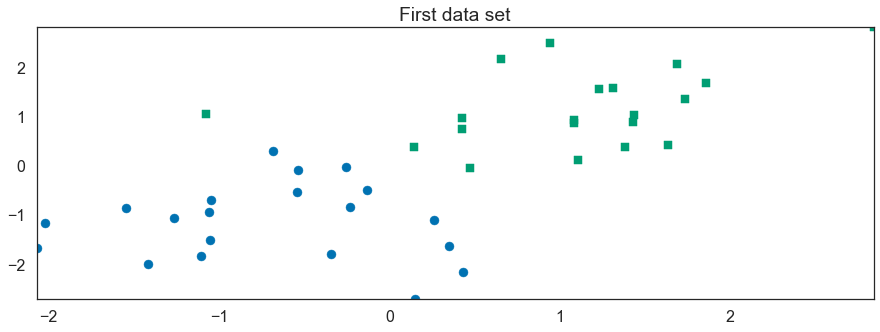

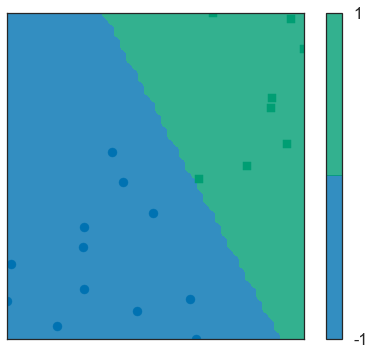

In [2]:
###############################################################################
#               Toy dataset : 2 gaussians
###############################################################################

n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('First data set')
plot_2d(X1, y1)

X_train = X1[::2]
Y_train = y1[::2].astype(int)
X_test = X1[1::2]
Y_test = y1[1::2].astype(int)

# fit the model with linear kernel
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict labels for the test data base
y_pred = clf.predict(X_test)

# check your score
score = clf.score(X_test, Y_test)
print('Score : %s' % score)
# display the frontiere


def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))

plt.figure(2)
frontiere(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

# SVM et noyaux pour la classification binaire

## Question 1

Score : 0.7


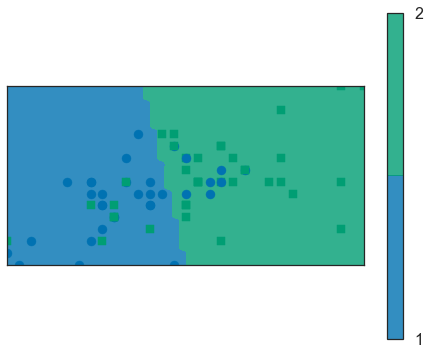

In [3]:
###############################################################################
#               Iris Dataset
###############################################################################

from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

svc_lin = SVC(kernel='linear')

# TODO : split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit the model
svc_lin.fit(X_train, y_train)

# predict labels
y_pred_lin = svc_lin.predict(X_test)

# check your score
score_lin = svc_lin.score(X_test, y_test)
print('Score : %s' % score_lin)

# display your results using plot_2d and frontiere
def f_lin(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return svc_lin.predict(xx.reshape(1, -1))

plt.figure(2)
frontiere(f_lin, X_train, y_train, w=None, step=50, alpha_choice=1)

## Question 2

Score : 0.7


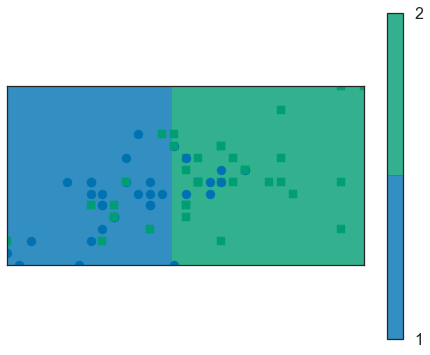

In [4]:
svc_poly = SVC(kernel='poly')

# fit the model
svc_poly.fit(X_train, y_train)

# predict labels
y_pred_poly = svc_poly.predict(X_test)

# check your score
score_poly = svc_poly.score(X_test, y_test)
print('Score : %s' % score_poly)

# display your results using plot_2d and frontiere
def f_poly(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return svc_poly.predict(xx.reshape(1, -1))

plt.figure(2)
frontiere(f_poly, X_train, y_train, w=None, step=50, alpha_choice=1)

# Classification de visages

In [5]:
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

In [6]:
####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

In [7]:
####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

## Question 5

In [8]:
####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()


#TODO : fit a classifier
svc_fc = SVC(kernel='linear', C=10)
svc_fc.fit(X_train, y_train)


print("Predicting the people names on the testing set")
t0 = time()

# TODO : predict labels for the X_test images
y_pred = svc_fc.predict(X_test)

print("done in %0.3fs" % (time() - t0))
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % svc_fc.score(X_test, y_test))

Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.231s
Chance level : 0.621052631579
Accuracy : 0.905263157895


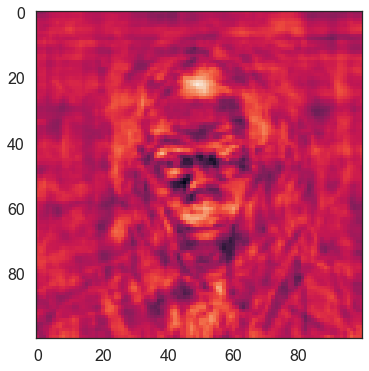

In [9]:
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(svc_fc.coef_, (h, w)))

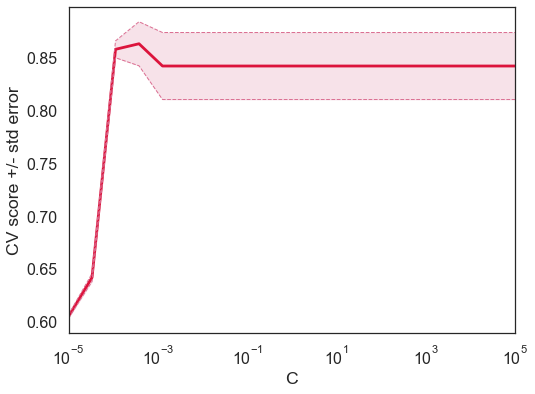

In [10]:
#QUESTION 5 : TODO : try various values for C in the SVC function 
#and plot the error curve
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-5, 5, 20)
tuned_parameters = [{'C': Cs}]
n_folds = 3

clf = GridSearchCV(svc_fc, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(Cs, scores, color='crimson', label='scores')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(Cs, scores + std_error, linestyle='--', color='palevioletred', 
             linewidth=1, label='Standard deviation')
plt.semilogx(Cs, scores - std_error, linestyle='--', color='palevioletred', 
             linewidth=1)

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(Cs, scores + std_error, scores - std_error, color='palevioletred', alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('C')
#plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([Cs[0], Cs[-1]])
plt.show()

Starting tests
    | Updating C to value  1e-05
    | Updating C to value  3.35981828628e-05
    | Updating C to value  0.000112883789168
    | Updating C to value  0.000379269019073
Max score = 0.92 obtained with C = 0.000379 


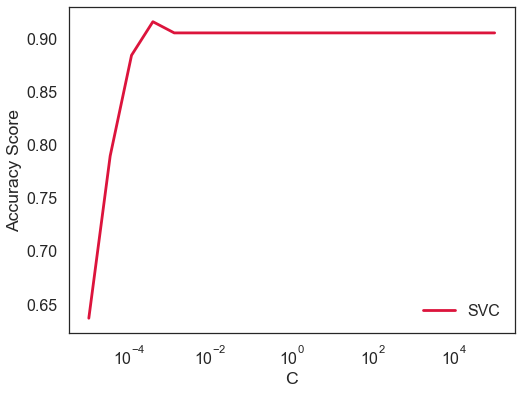

In [11]:
svc = SVC(kernel='linear')
svcs = {}
scores = np.zeros(len(Cs))

max_score = 0
C = 0

print("Starting tests")
for i, c in enumerate(Cs, 0):
    svc.C = c
    svc.fit(X_train, y_train)
    svcs[c] = svc
    # error = 1 - dt.score(X, Y)
    score = svc.score(X_test, y_test)
    if score > max_score:
        max_score = score
        C = c
        print("    | Updating C to value ", c)
    scores[i] = svc.score(X_test, y_test)

print("Max score = %.2f obtained with C = %f " %(max_score, C))

plt.semilogx(Cs, scores, color="crimson", label="SVC")
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [12]:
# Take last svc model
y_pred = svc.predict(X_test)

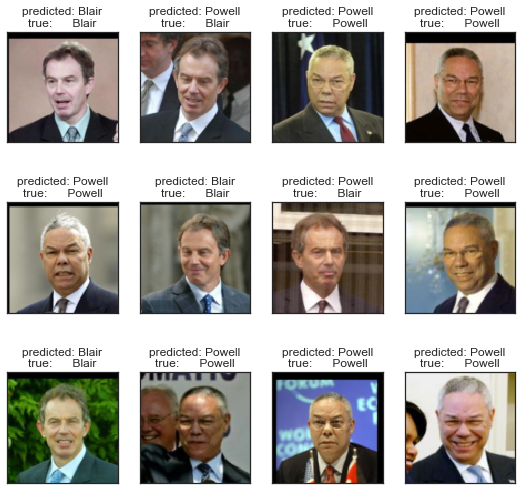

In [13]:
####################################################################
# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

## Question 6

In [14]:
#NOISE
salt_value = 40
noise = np.random.randint(salt_value + 1, size=(100, 100))
indices_noise = np.where(noise == 0)
A = indices_noise[0]
B = indices_noise[1]

lfw_people.images[:,A,B,:] = 0

images_noise = lfw_people.images / 255.

n_samples, h, w, n_colors = images_noise.shape

In [15]:
idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images_noise = np.r_[images_noise[idx0], images_noise[idx1]]

n_samples = images_noise.shape[0]
y_noise = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

# Extract features

# features using only illuminations
X_noise = (np.mean(images_noise, axis=3)).reshape(n_samples, -1)

# Scale features
X_noise -= np.mean(X_noise, axis=0)
X_noise /= np.std(X_noise, axis=0)

/Users/thaianthantrong/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [16]:
indices = np.random.permutation(X_noise.shape[0])
train_idx, test_idx = indices[:int(X_noise.shape[0] / 2)], indices[int(X_noise.shape[0] / 2):]
X_train_noise, X_test_noise = X_noise[train_idx, :], X_noise[test_idx, :]
y_train_noise, y_test_noise = y_noise[train_idx], y_noise[test_idx]
images_train_noise, images_test_noise = images_noise[
    train_idx, :, :, :], images_noise[test_idx, :, :, :]

N = 50

Starting tests
    | Updating C to value  1e-05
    | Updating C to value  3.35981828628e-05
    | Updating C to value  0.000112883789168
    | Updating C to value  0.000379269019073
Max score = 0.94 obtained with C = 0.000379 


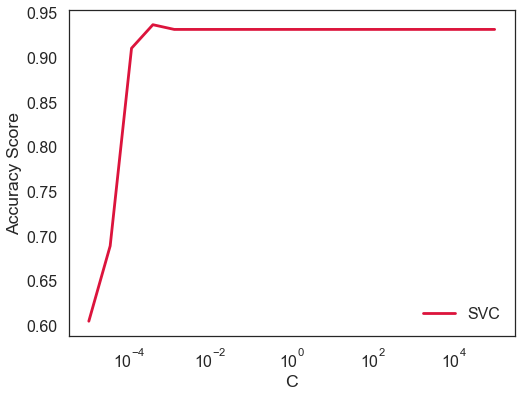

In [17]:
#NaN or infinite values prevent SVC to work properly
X_train_noise = np.nan_to_num(X_train_noise)
X_test_noise = np.nan_to_num(X_test_noise)

svc = SVC(kernel='linear')
svcs = {}
scores = np.zeros(len(Cs))

max_score = 0
C = 0

print("Starting tests")
for i, c in enumerate(Cs, 0):
    svc.C = c
    svc.fit(X_train_noise, y_train_noise)
    svcs[c] = svc
    # error = 1 - dt.score(X, Y)
    score = svc.score(X_test_noise, y_test_noise)
    if score > max_score:
        max_score = score
        C = c
        print("    | Updating C to value ", c)
    scores[i] = svc.score(X_test_noise, y_test_noise)

print("Max score = %.2f obtained with C = %f " %(max_score, C))

plt.semilogx(Cs, scores, color="crimson", label="SVC")
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [18]:
# Take last svc model
y_pred = svc.predict(X_test_noise)

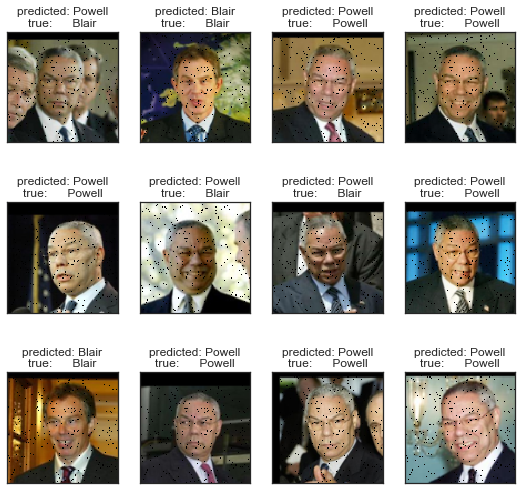

In [19]:
prediction_titles_noise = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test_noise, prediction_titles_noise)
pl.show()

## Question 8

Starting tests
    | Updating C to value  1e-05
    | Updating C to value  0.545559478117
    | Updating C to value  1.83298071083
Max score = 0.85 obtained with C = 1.832981 


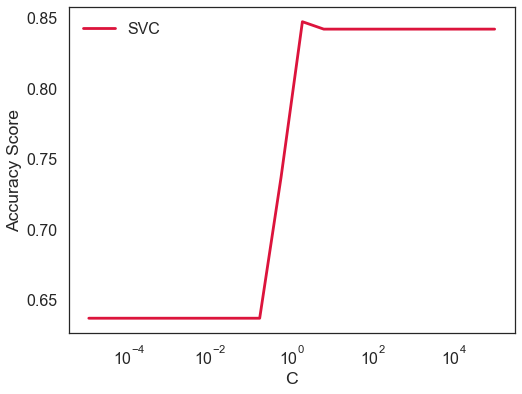

In [20]:
svc = SVC(kernel='rbf')
svcs = {}
scores = np.zeros(len(Cs))

max_score = 0
C = 0

print("Starting tests")
for i, c in enumerate(Cs, 0):
    svc.C = c
    svc.fit(X_train, y_train)
    svcs[c] = svc
    # error = 1 - dt.score(X, Y)
    score = svc.score(X_test, y_test)
    if score > max_score:
        max_score = score
        C = c
        print("    | Updating C to value ", c)
    scores[i] = svc.score(X_test, y_test)

print("Max score = %.2f obtained with C = %f " %(max_score, C))

plt.semilogx(Cs, scores, color="crimson", label="SVC")
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [21]:
#QUESTION 8 : TODO : try reducing the dimension using sklearn.decomposition.RandomizedPCA and compute again an SVM classifer.
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized')

In [22]:
from sklearn.metrics import classification_report

In [23]:
def pcaTrainAndPredict(n_components=150):
    """"
    Faces recognition example using eigenfaces and SVMs
    """""

    #Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
    #dataset): unsupervised feature extraction / dimensionality reduction

    print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
    t0 = time()
    pca.n_components = n_components
    pca.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    
    eigenfaces = pca.components_.reshape((n_components, h, w))
    
    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - t0))

    # Train a SVM classification model

    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {
             'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              }
    clf = GridSearchCV(SVC(kernel='rbf'), param_grid)
    clf = clf.fit(X_train_pca, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)


    ###############################################################################
    # Quantitative evaluation of the model quality on the test set

    print("Predicting the people names on the testing set")
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("done in %0.3fs" % (time() - t0))

    print(classification_report(y_test, y_pred, target_names=names))

In [24]:
pcaTrainAndPredict()

Extracting the top 150 eigenfaces from 190 faces
done in 0.325s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.040s
Fitting the classifier to the training set
done in 1.019s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.006s
              precision    recall  f1-score   support

  Tony Blair       0.83      0.80      0.81        69
Colin Powell       0.89      0.91      0.90       121

 avg / total       0.87      0.87      0.87       190



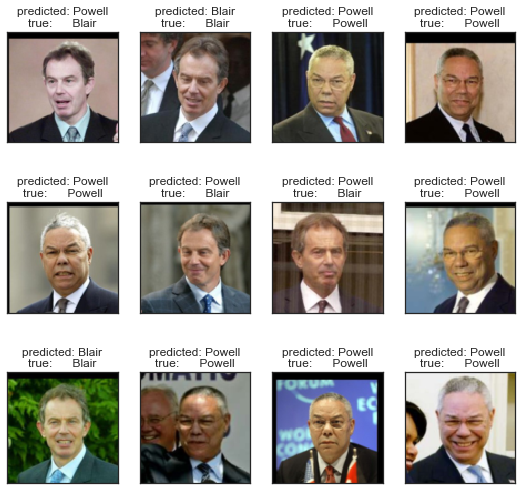

In [25]:
prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)

pl.show()